In [171]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

In [148]:
def R(theta):
    """The rotation matrix for angle theta"""
    return np.matrix([[np.cos(theta), np.sin(theta)],[-np.sin(theta), np.cos(theta)]])

In [149]:
def wp(phi,theta):
    """A General waveplate with phase retardance phi at angle theta to the horizontal."""
    return np.matrix([[np.cos(phi/2) + 1j*np.sin(phi/2)*np.cos(2*theta) ,1j*np.sin(phi/2)*np.sin(2*theta)],
                      [1j*np.sin(phi/2)*np.sin(2*theta) , np.cos(phi/2) - 1j*np.sin(phi/2)*np.cos(2*theta) ]])

In [150]:
def intensity(vect):
    """Return the intensity of a jones vector"""
    intensity = vect.H * vect
    return intensity[0,0]

In [151]:
def plotpol(vect):
    """Plot the representation of a jones vector"""

## Begin testing here

In [152]:
qwp = np.matrix([[1, 0],[0, -1j]])

In [153]:
R(-np.pi/4)*qwp*R(np.pi/4)

matrix([[0.5-0.5j, 0.5+0.5j],
        [0.5+0.5j, 0.5-0.5j]])

In [154]:
qwp45 = wp(np.pi/2, np.pi/4)
qwp45

matrix([[0.70710678+4.32978028e-17j, 0.        +7.07106781e-01j],
        [0.        +7.07106781e-01j, 0.70710678-4.32978028e-17j]])

In [155]:
wp(np.pi/2, 0)

matrix([[0.70710678+0.70710678j, 0.        +0.j        ],
        [0.        +0.j        , 0.70710678-0.70710678j]])

In [156]:
vpol = np.matrix([[0,0],[0,1]])
vpol

matrix([[0, 0],
        [0, 1]])

In [157]:
np.exp(1j*np.pi/4)

(0.7071067811865476+0.7071067811865475j)

In [158]:
horiz = np.matrix([[1],[0]])

In [159]:
output = qwp*horiz

In [160]:
intensity(output)

(1+0j)

In [161]:
before_cell = wp(np.pi/2,np.pi/4)*wp(np.pi,np.pi/10)*horiz

In [162]:
output = vpol*wp(np.pi/2,-np.pi/4)*before_cell

In [163]:
intensity(output)

(0.3454915028125263+0j)

As given by newport (https://www.newport.com/f/quartz-zero-order-waveplates), the wave error at 795 (vs 780) corresponds to a normalized wavelength of 1.02, giving wave error of -0.08 waves. That corresponds to a phase error of 2pi*(-0.08) = 0.5 radians.

We'll explore the effect of this phase error below:

Text(0.5, 1.0, 'rotating qwp w/error between crossed pols')

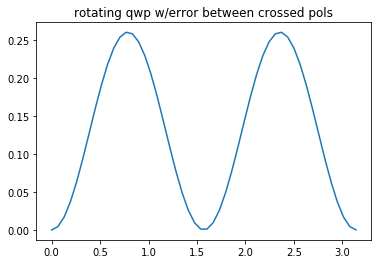

In [165]:
ivals = []
thetas = np.linspace(0,np.pi)
for theta in thetas:
    #        vpol        quarter             quarter                   half               input
    output = vpol*wp(np.pi/2-0.5,theta)*horiz
    ivals.append(intensity(output))
    
plt.plot(thetas,ivals) 
plt.title("rotating qwp w/error between crossed pols")

Text(0.5, 0, 'qwp1 angle (rad)')

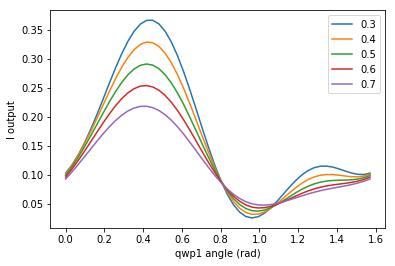

In [166]:
ivals = []
thetas = np.linspace(0,np.pi/2)
for phi in [0.3,0.4,0.5,0.6,0.7]:  # try a range of phase errors to compare
    ivals = []
    for theta in thetas:
        #        vpol        quarter             quarter                   half               input
        output = vpol*wp(np.pi/2 - phi,-theta)*wp(np.pi/2 - phi,theta)*wp(np.pi - phi,np.pi/19)*horiz
        ivals.append(intensity(output))

    plt.plot(thetas,ivals,label=phi)
    
plt.legend()
plt.ylabel("I output")
plt.xlabel("qwp1 angle (rad)")

Text(0.5, 1.0, 'QWP w/ phase error')

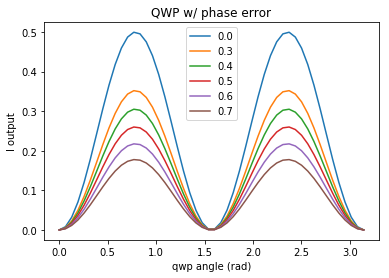

In [167]:
# Rotating 780 QWP between crossed pols
# at 795 nm
ivals = []
thetas = np.linspace(0,np.pi)
for phi in [0.0,0.3,0.4,0.5,0.6,0.7]:
    ivals = []
    for theta in thetas:
        output = vpol*wp(np.pi/2 - phi,theta)*horiz
        ivals.append(intensity(output))

    plt.plot(thetas,ivals,label=phi)
    
plt.legend()
plt.ylabel("I output")
plt.xlabel("qwp angle (rad)")
plt.title("QWP w/ phase error")

So we should expect about 0.25 maximum intensity through our 780 waveplate.

## tinkering below here

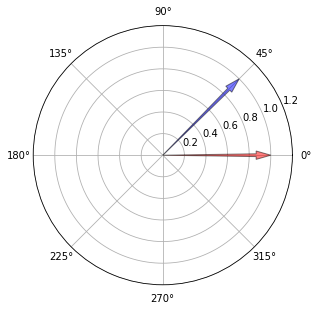

In [168]:
# try to plot vectors for the polarization components
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9], polar=True)

r = np.arange(0, 3.0, 0.01)
theta = 2*np.pi*r

ax.set_rmax(1.2)
#plt.grid(True)

# arrow at 0
arr1 = plt.arrow(0, 0, 0, 1, alpha = 0.5, width=0.03, length_includes_head=True,
                 edgecolor = 'black', facecolor = 'red', zorder = 5)

# arrow at 45 degree
arr2 = plt.arrow(np.pi/4, 0, 0, 1, alpha = 0.5, width=0.03, length_includes_head=True,
                 edgecolor = 'black', facecolor = 'blue', zorder = 5)

plt.show()

In [119]:
from qutip import *

In [176]:
%matplotlib notebook

<IPython.core.display.Javascript object>


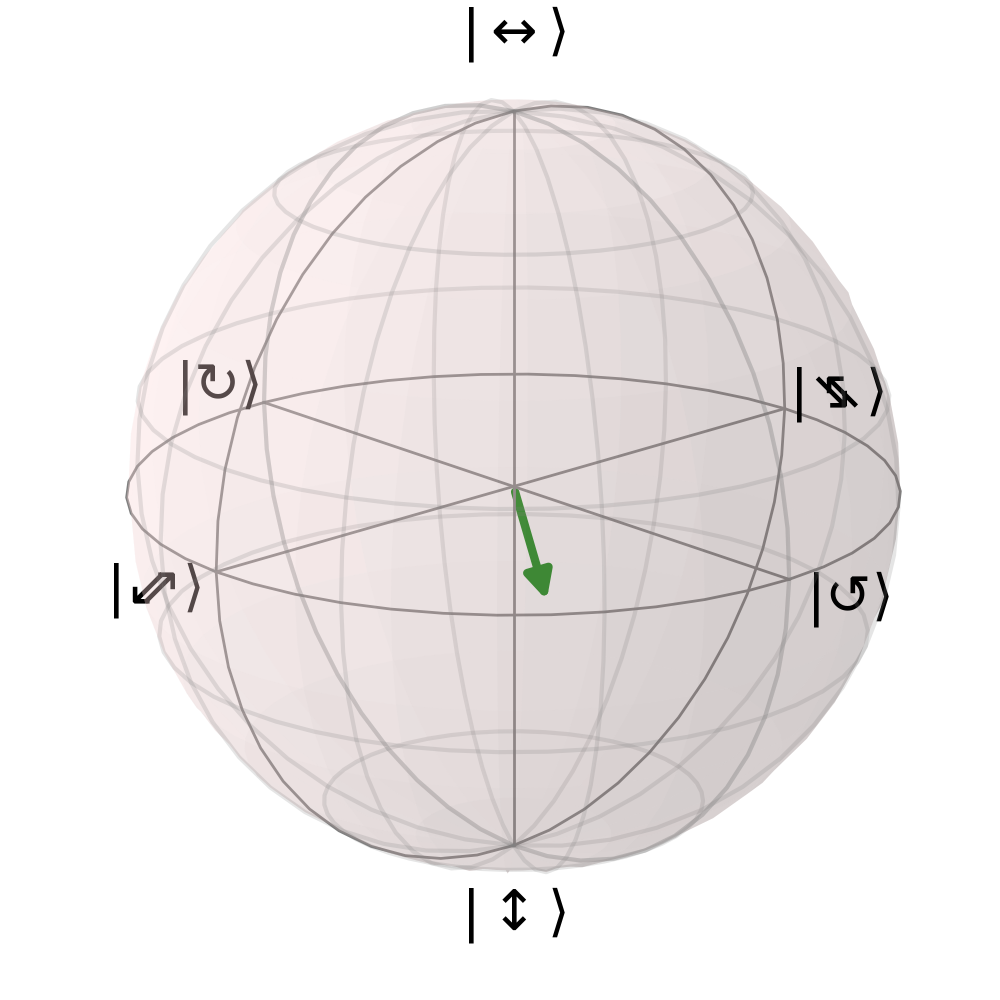

In [224]:
# Start horizontal pol, propagate through system:
phi = 0.03
theta = pi/4
out = wp(np.pi/2 - phi,theta)*wp(np.pi,pi/19)*horiz
state = Qobj(out)

b = Bloch()
b.set_label_convention("polarization jones")
b.add_states(state)
b.show()

In [228]:
2*pi*0.25 - 2*pi*0.245

0.031415926535897976